In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from IPython.display import clear_output
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn import linear_model
#a remove :[8, 10, 12, 13, 22, 96, 117, 126, 136, 137]

In [2]:
def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def MAPE(Y_Predicted,Y_actual):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [3]:
variables = pickle.load(open(r'jeu_variables_2.pkl','rb'))
entetes = np.array(variables['X']).reshape(72,141)[:,0]
X = np.array(variables['X']).reshape(72,141)[:,1:141].T.astype('float')
Y = np.array(variables['Y']).reshape(140).astype('float')
remove_bat = [8, 10, 12, 13, 22, 96, 117, 126, 136, 137]
X_clean = np.delete(X, remove_bat, 0)
Y_clean = np.delete(Y, remove_bat)
X = X_clean
Y = Y_clean

In [4]:
def preprossessing(X,Y):# Séparation des données
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
    
    # Normalisation des données
    #sc = StandardScaler(with_mean=True, with_std=True)
    #sc.fit(X_train)
    #X_train = sc.transform(X_train)
    #X_test = sc.transform(X_test)
    return X_train, X_test, Y_train, Y_test

In [5]:
def normalize(X_train, X_test):
    sc = StandardScaler(with_mean=True, with_std=True)
    sc.fit(X_train)
    X_train_n = sc.transform(X_train)
    X_test_n = sc.transform(X_test)
    return sc, X_train_n, X_test_n

In [6]:
X_train, X_test, Y_train, Y_test = preprossessing(X, Y)
sc_x,  X_train_n, X_test_n = normalize(X_train , X_test)
sc_y, Y_train_n, Y_test_n = normalize(Y_train.reshape(-1, 1) ,Y_test.reshape(-1,1))
#print(np.mean(X_train_n[:, 1]))

In [7]:
rf = sklearn.ensemble.RandomForestRegressor()
rf.fit(X_train_n, Y_train_n)
Y_train_predict_n = rf.predict(X_train_n)
Y_predict_n = rf.predict(X_test_n)
print(f"RMSE train normalisé : {RMSE(Y_train_predict_n, Y_train_n)}")
print(f"RMSE test normalisé : {RMSE(Y_predict_n, Y_test_n)}")
#on dénormalise
Y_predict = sc_y.inverse_transform(Y_predict_n.reshape(-1,1))
print(f"RMSE test normalisé : {RMSE(Y_predict, Y_test)}")
print(rf.feature_importances_)
max_feature_importance = np.argmax(rf.feature_importances_)
print(entetes[max_feature_importance])

/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RMSE train normalisé : 1.3493962765511134
RMSE test normalisé : 1.3854973267742314
RMSE test normalisé : 424.8797988135958
[0.00210376 0.00093873 0.00233366 0.00102515 0.0005224  0.00051574
 0.0009005  0.00147138 0.00338566 0.0081199  0.00132399 0.00143368
 0.12812876 0.00065613 0.00054562 0.00071883 0.00303053 0.00381633
 0.00070043 0.00122845 0.00095477 0.11274894 0.0005865  0.00044227
 0.00121788 0.00908358 0.00075533 0.00032639 0.00345956 0.00034614
 0.27147019 0.00096593 0.02847341 0.00097884 0.01836068 0.00206234
 0.00778339 0.00132734 0.00245618 0.17326145 0.00537157 0.02789311
 0.0011828  0.0121321  0.00707236 0.00111416 0.00805013 0.0077919
 0.00041398 0.0004247  0.00036359 0.00603362 0.00072695 0.00160339
 0.00081384 0.00324398 0.00155093 0.00084396 0.00077674 0.0004912
 0.0051185  0.00217195 0.00822271 0.00215957 0.05752688 0.0029435
 0.00049134 0.00092457 0.0013966  0.01528669 0.01156417 0.00433778]
Qdlin 150-10


In [8]:
#on garde les 10 variables les plus importantes
index = np.argpartition(rf.feature_importances_, -10)[-10:]
for i in index:
    print(entetes[i])

dQdV 150-100
V var 150
dQdV 150-10
Qdlin 150-10
Qdlin 100-10
Qc var 150
Qdlin 150-100
Qdlin mean 150
Tdlin 150-100
Tdlin 150-10


In [9]:
X_10 = X[:, index]
print(X_10.shape)

(130, 10)


In [30]:
X_train, X_test, Y_train, Y_test = preprossessing(X_10, Y)
sc_x,  X_train_n, X_test_n = normalize(X_train , X_test)
sc_y, Y_train_n, Y_test_n = normalize(Y_train.reshape(-1,1) ,Y_test.reshape(-1,1))
print(X_train_n.shape)

(65, 10)


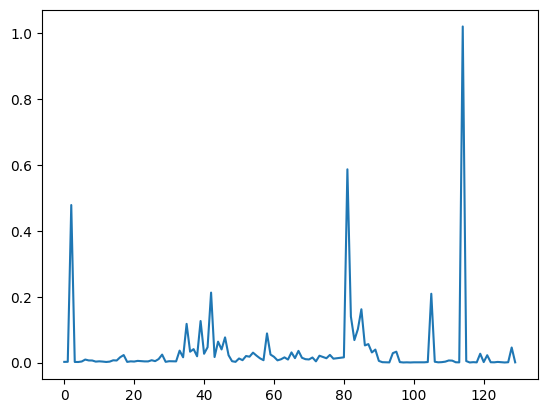

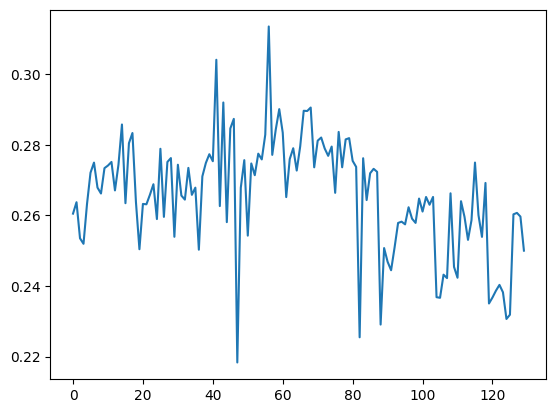

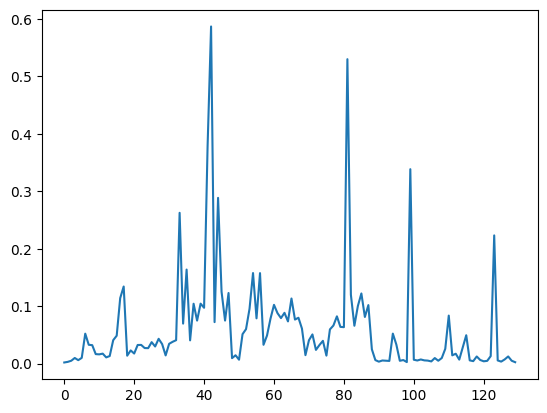

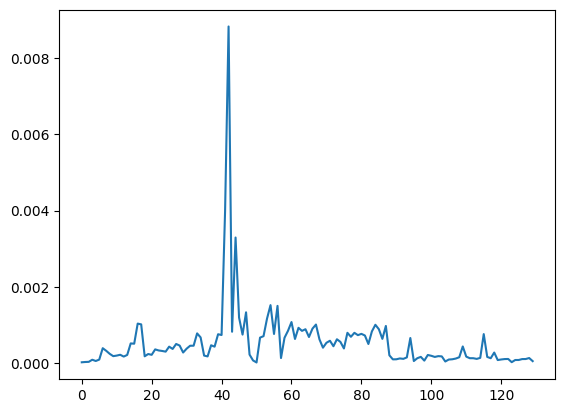

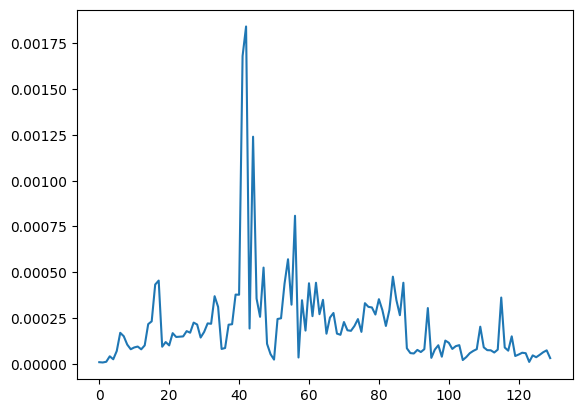

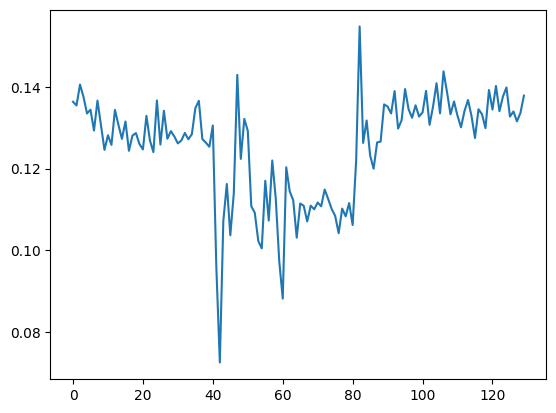

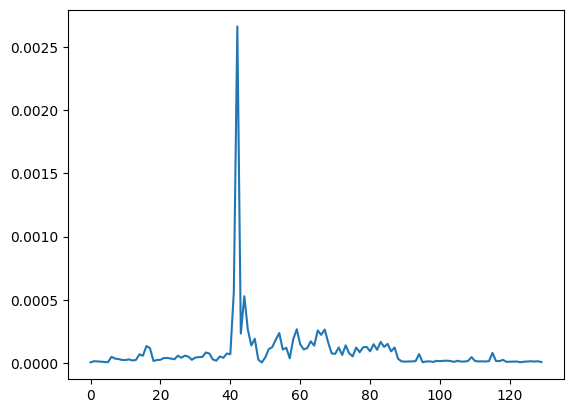

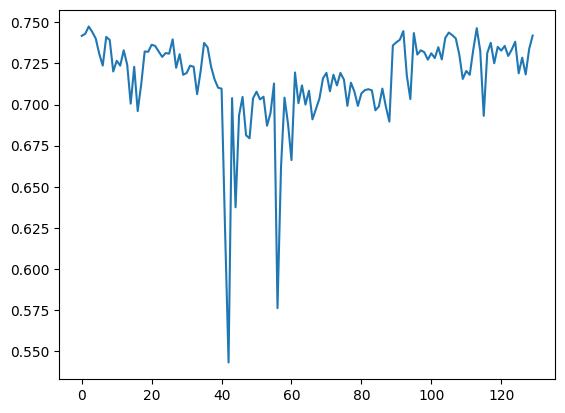

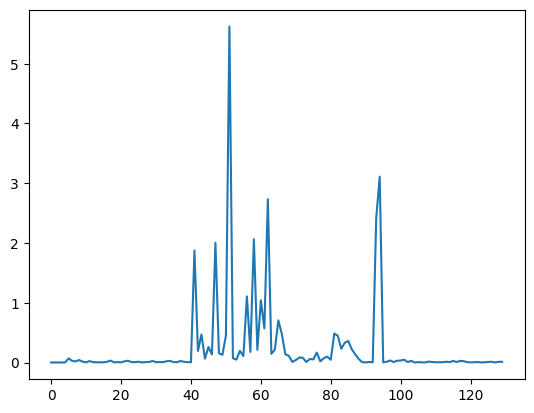

In [11]:
for i in range(9):
    plt.plot(X_10[:,i])
    plt.show()

In [12]:
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel

irregularities_kernel = 5.0**2 * RationalQuadratic(length_scale=5.0, alpha=1.0)
long_term_trend_kernel = 2.0**2 * RBF(length_scale=2.0)
noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5)
)
kernel_gpr = irregularities_kernel + long_term_trend_kernel + noise_kernel

In [13]:
gpr = sklearn.gaussian_process.GaussianProcessRegressor(kernel=kernel_gpr, n_restarts_optimizer=10)
gpr.fit(X_train_n, Y_train_n)

/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


GaussianProcessRegressor(kernel=5**2 * RationalQuadratic(alpha=1, length_scale=5) + 2**2 * RBF(length_scale=2) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=10)

RMSE test normalisé : 409.21917095630255


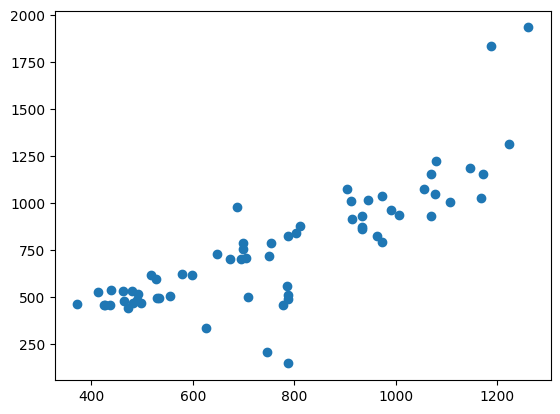

In [14]:
Y_predict_n = gpr.predict(X_test_n)
Y_predict = sc_y.inverse_transform(Y_predict_n)
print(f"RMSE test normalisé : {RMSE(Y_predict, Y_test)}")
plt.scatter(Y_predict, Y_test)

In [15]:
print(Y_test)
print(Y_train)

[ 485.  599. 1017.  704.  541.  209.  509. 1315.  499.  876. 1836.  731.
  527. 1227. 1039.  932. 1051.  459.  828.  462. 1014.  880. 1158.  719.
  796.  444.  498.  478.  511. 1190.  862.  148.  561.  917.  471. 1028.
 1009.  788.  535.  842.  335.  495.  828.  703.  489. 1935.  788.  617.
  461.  709.  935.  757. 1078.  940.  458. 1074.  468.  519.  616.  982.
  966.  534. 1156.  625.  457.]
[ 870.  438.  463. 1638. 1002. 1054.  857.  667. 1226.  559.  651.  492.
  816.  636.  466.  989.  850.  483. 1061. 1284.  480.  813.  502.  786.
  465.  923. 1115.  300.  494. 1063.  663.  713.  825.  483.  499.  648.
 1390.  487.  513.  772.  702.  742. 1155.  858. 1179.  477.  870. 1177.
  860.  876.  817.  429.  731.  520.  487.  429. 1093. 1801.  854.  461.
  481. 1146.  691. 1048.  858.]


In [33]:
def linear_regression(X,Y):
    # Preprocessing
    print(X.shape)
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    print(X_train.shape)
    
    # Modèle linéaire
    reg = linear_model.LinearRegression().fit(X_train, Y_train)

    # Prédictions
    mean_prediction_train = reg.predict(X_train)
    mean_prediction_test = reg.predict(X_test)    
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))
    
    plt.scatter(mean_prediction_test, Y_test)
    print(reg.coef_)
    print(X_train.shape)

In [17]:
def linear_logistic_regression(X,Y):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle linéaire regression logistique
    clf = linear_model.LogisticRegression(penalty="none", solver="newton-cg")
    clf.fit(X_train, Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)   
    
    plt.scatter(Y_test, mean_prediction_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [18]:
def gaussian_process(X,Y):   
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle gaussien
    kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
    my_gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    my_gaussian_process.fit(X_train, Y_train)
    my_gaussian_process.kernel_
    
    # Prédictions
    mean_prediction_train, std_prediction = my_gaussian_process.predict(X_train, return_std=True)
    mean_prediction, std_prediction = my_gaussian_process.predict(X_test, return_std=True)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction,Y_test))

In [19]:
def lasso(X,Y,alpha):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle Lasso
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(X_train,Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [20]:
def lassoLars(X,Y,alpha):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle Lasso
    clf = linear_model.LassoLars(alpha=alpha, normalize=False)
    clf.fit(X_train,Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [21]:
def random_forests(X,Y,depth):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle random forests
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    
    clf.fit(X_train,Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

In [22]:
def svr(X,Y):
    # Preprocessing
    X_train, X_test, Y_train, Y_test = preprossessing(X,Y)
    
    # Modèle SVR
    clf = SVR(C=1.0, epsilon=0.2)
    clf.fit(X_train,Y_train)
    
    # Prédictions
    mean_prediction_train = clf.predict(X_train)
    mean_prediction_test = clf.predict(X_test)
    
    # Erreur d'entrainement
    print('Train - RMSE=',RMSE(mean_prediction_train,Y_train))
    print('Train - MAPE=',MAPE(mean_prediction_train,Y_train))
    
    # Erreur de test
    print('Test - RMSE=',RMSE(mean_prediction_test,Y_test))
    print('Test - MAPE=',MAPE(mean_prediction_test,Y_test))

(130, 10)
(65, 10)
Train - RMSE= 185.80257739565874
Train - MAPE= 19.537427718160057
Test - RMSE= 288.4397558804898
Test - MAPE= 29.173559616196748
[-1.22037361e+02 -7.14082400e+03  6.21305788e+01  1.93773382e+05
 -3.15946300e+05  2.05951486e+03 -3.87773104e+05  5.84481987e+03
  1.69035220e+01 -2.02824672e+02]
(65, 10)


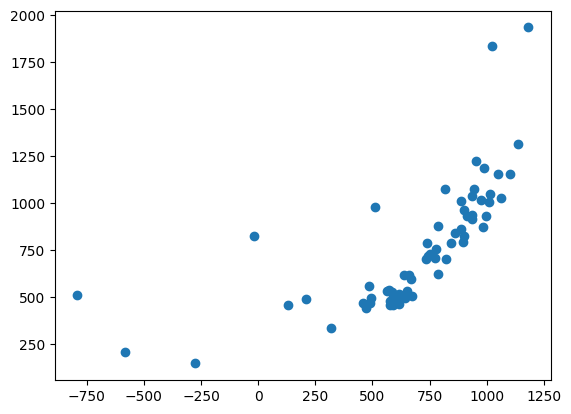

In [35]:
linear_regression(X_10,Y)

/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


Train - RMSE= 0.0
Train - MAPE= 0.0
Test - RMSE= 235.25701166694594
Test - MAPE= 23.059976564590574


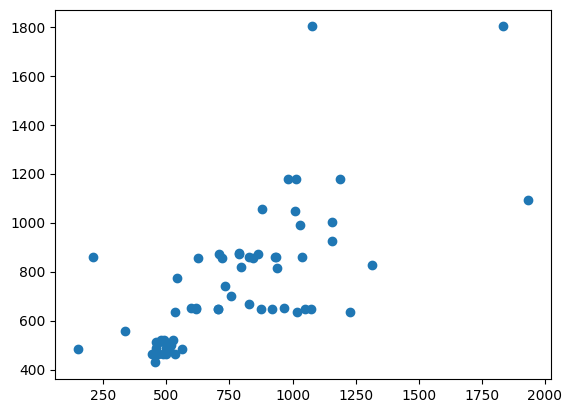

In [24]:
linear_logistic_regression(X,Y)

In [36]:
gaussian_process(X_10,Y)

Train - RMSE= 1.833551894465273e-12
Train - MAPE= 1.1390368230207741e-13
Test - RMSE= 582.2861981852991
Test - MAPE= 70.28123822501247


/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


In [26]:
lasso(X,Y,1.311)

Train - RMSE= 119.06863384766105
Train - MAPE= 10.865320507077538
Test - RMSE= 287.4661494152773
Test - MAPE= 37.2470108420424


/home/adrien/.local/share/virtualenvs/tim+iml_tp_env-QTCI9onf/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.269e+05, tolerance: 6.113e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [27]:
lassoLars(X,Y,1.33)

Train - RMSE= 119.31803324792462
Train - MAPE= 10.930171367664578
Test - RMSE= 284.1672729044871
Test - MAPE= 36.98297547250801


In [28]:
random_forests(X,Y,60)

Train - RMSE= 0.0
Train - MAPE= 0.0
Test - RMSE= 217.14001154873466
Test - MAPE= 19.148756798128392


In [37]:
svr(X_10,Y)

Train - RMSE= 305.74175760911874
Train - MAPE= 34.81552122858979
Test - RMSE= 326.7918626868968
Test - MAPE= 44.267385248798355


In [ ]:
#etster le ridge